In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

It is a matrixplot itssimilar to heatmap but also get clustering of rows and columns

## Basics - Toy Example

In [2]:
toy_data_dict = {
    'Name': ['Andy', 'Ben', 'Claire', 'David'],
    'Hours_Studied': [10, 20, 12, 28],
    'Score': [15, 20, 16, 25],
    'Street_Address': [11, 24, 18, 9]
}

In [3]:

toy_data = pd.DataFrame(toy_data_dict)
toy_data.set_index('Name', inplace=True)

toy_data

,Hours_Studied,Score,Street_Address
Name,,,
Andy,10,15,11
Ben,20,20,24
Claire,12,16,18
David,28,25,9


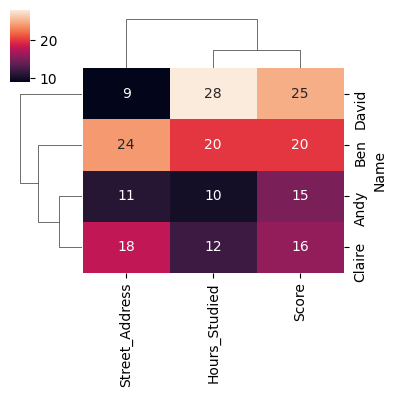

In [6]:
sns.clustermap(toy_data,figsize=(4,4),annot=True)#the line s are called dendograms that's how seaborn clusteringthe data

## HAC(hierarchical agglomerative clustering)

its start with each point as a cluster and then merge together the closest clusters until it become a single cluster

In [7]:
penguins = sns.load_dataset('penguins').dropna()

In [8]:

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [9]:

numerical_cols = penguins.columns[2:6]

numerical_cols

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

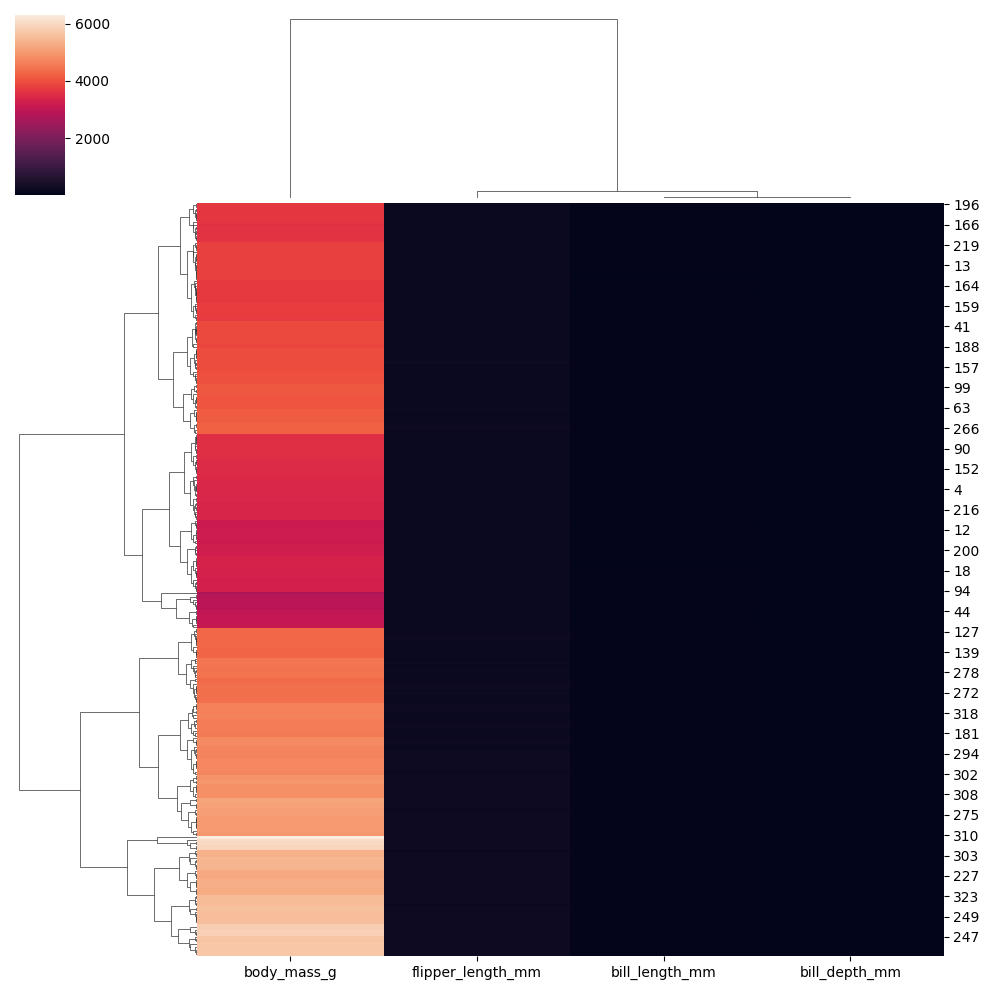

In [10]:
sns.clustermap(penguins[numerical_cols])

# scaling data

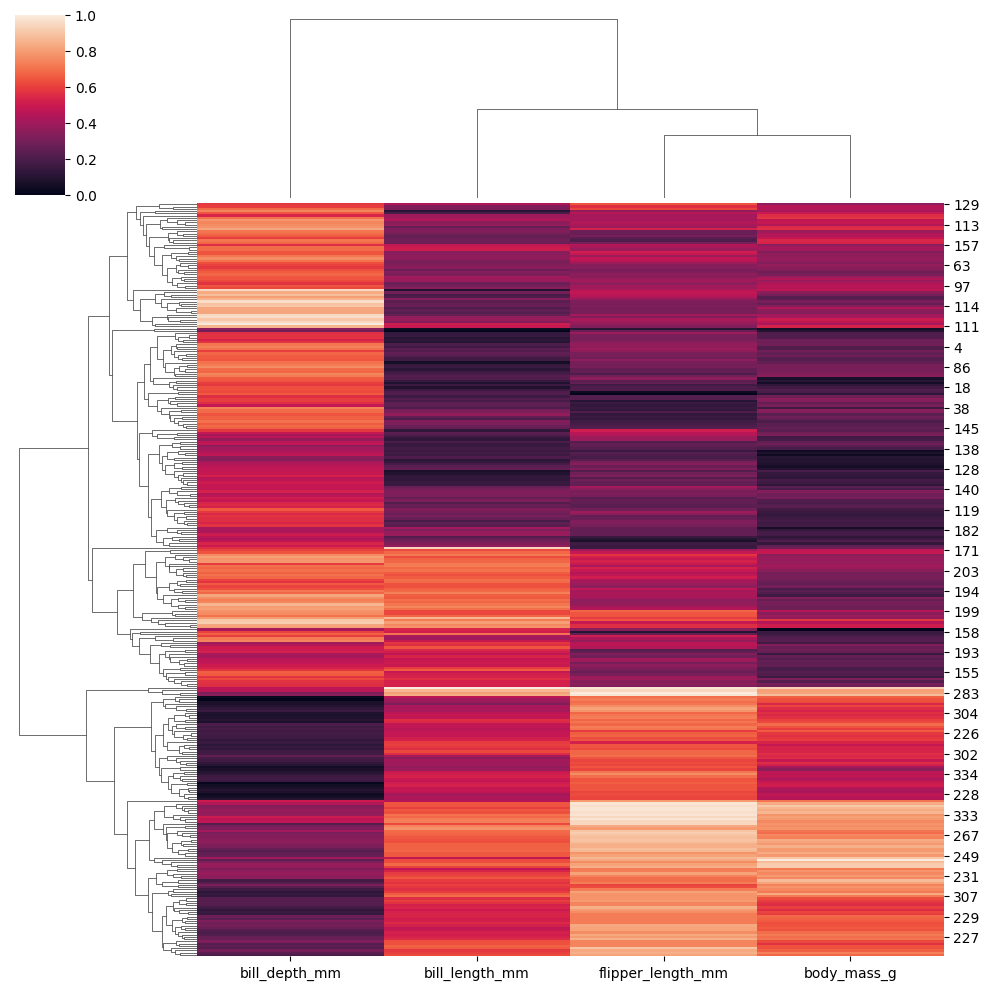

In [11]:
#standard_scale
sns.clustermap(penguins[numerical_cols],standard_scale=1)# 1 for scale column, 0 for scale row

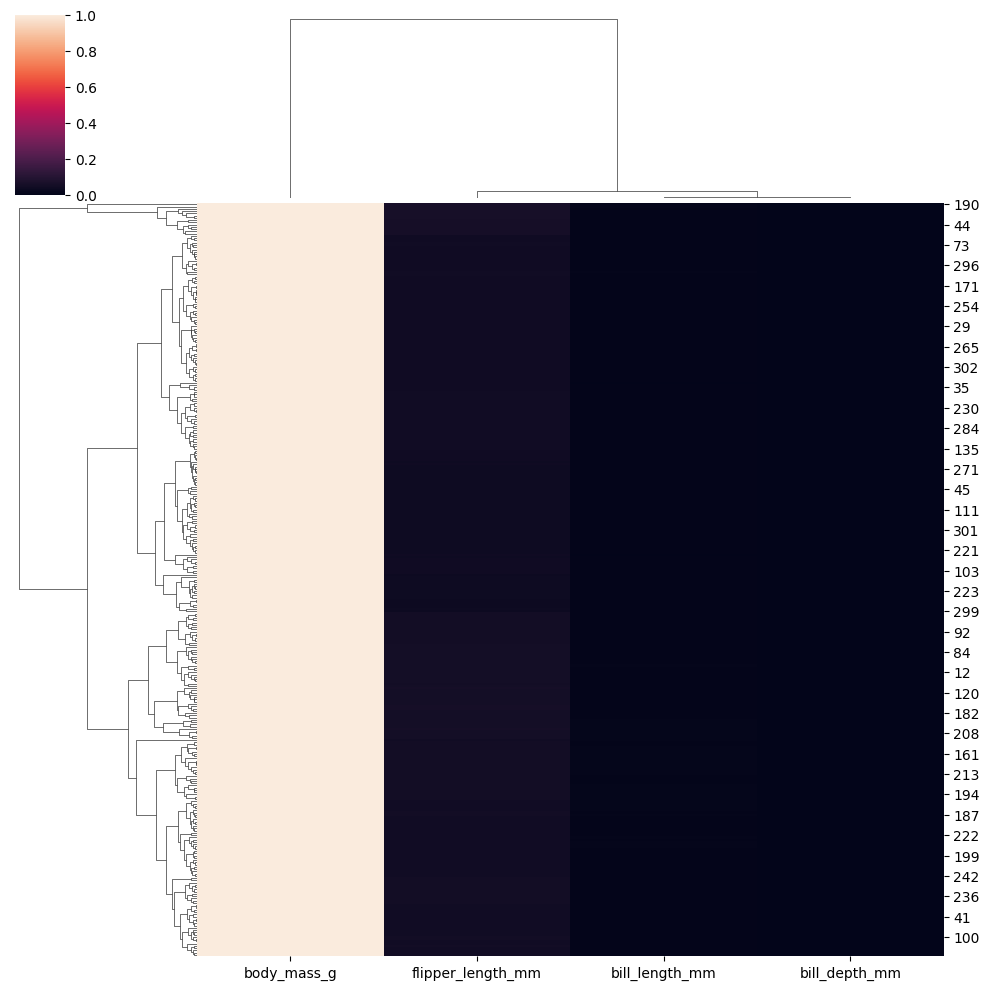

In [12]:
sns.clustermap(penguins[numerical_cols],standard_scale=0)

# metric and linkage
metric is the distance that is used to judgedistabces between points and clusters(default is euclidean)


linkage determining the clustering criteria or no of points to be clustered

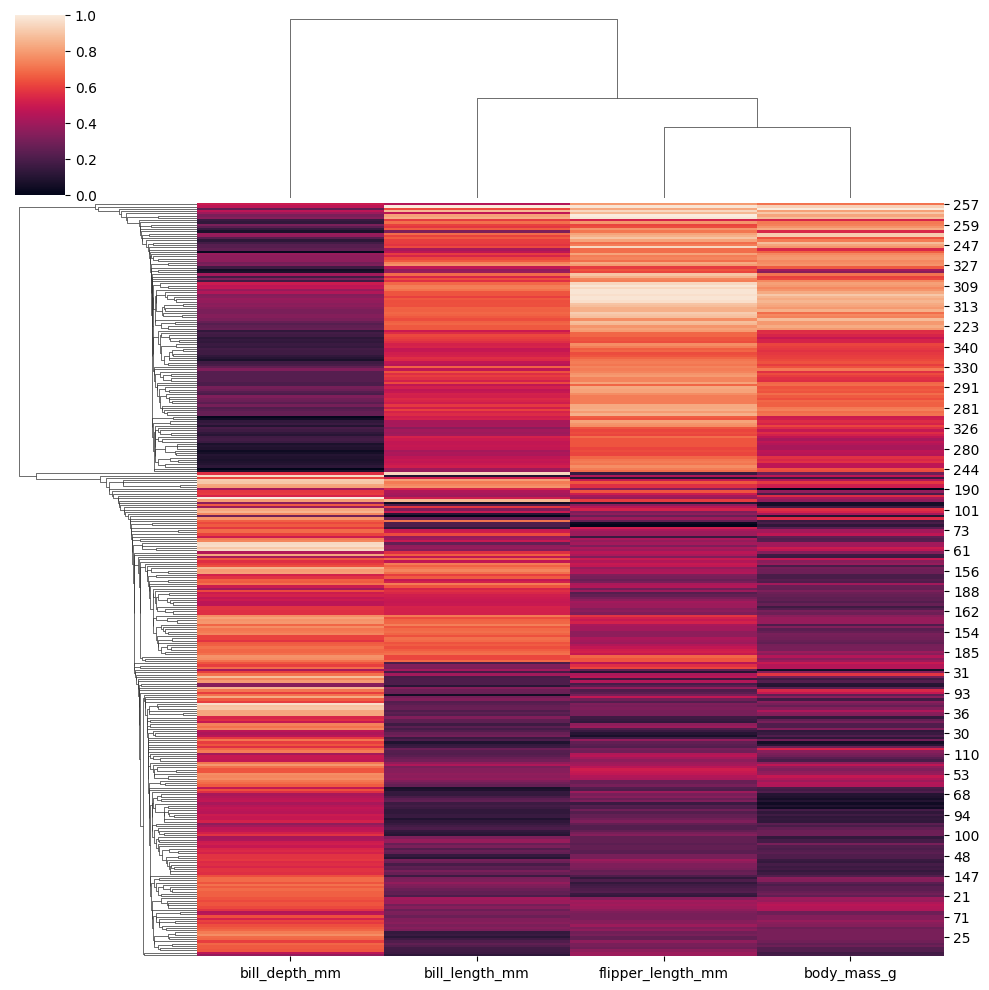

In [13]:
sns.clustermap(penguins[numerical_cols],standard_scale=1,method='single')## it eis the minimum linkage

## additional options
row colors

In [14]:
species_colors=penguins.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

In [15]:

len(species_colors)

333

In [16]:

species_colors[:5]

0    blue
1    blue
2    blue
4    blue
5    blue
Name: species, dtype: object

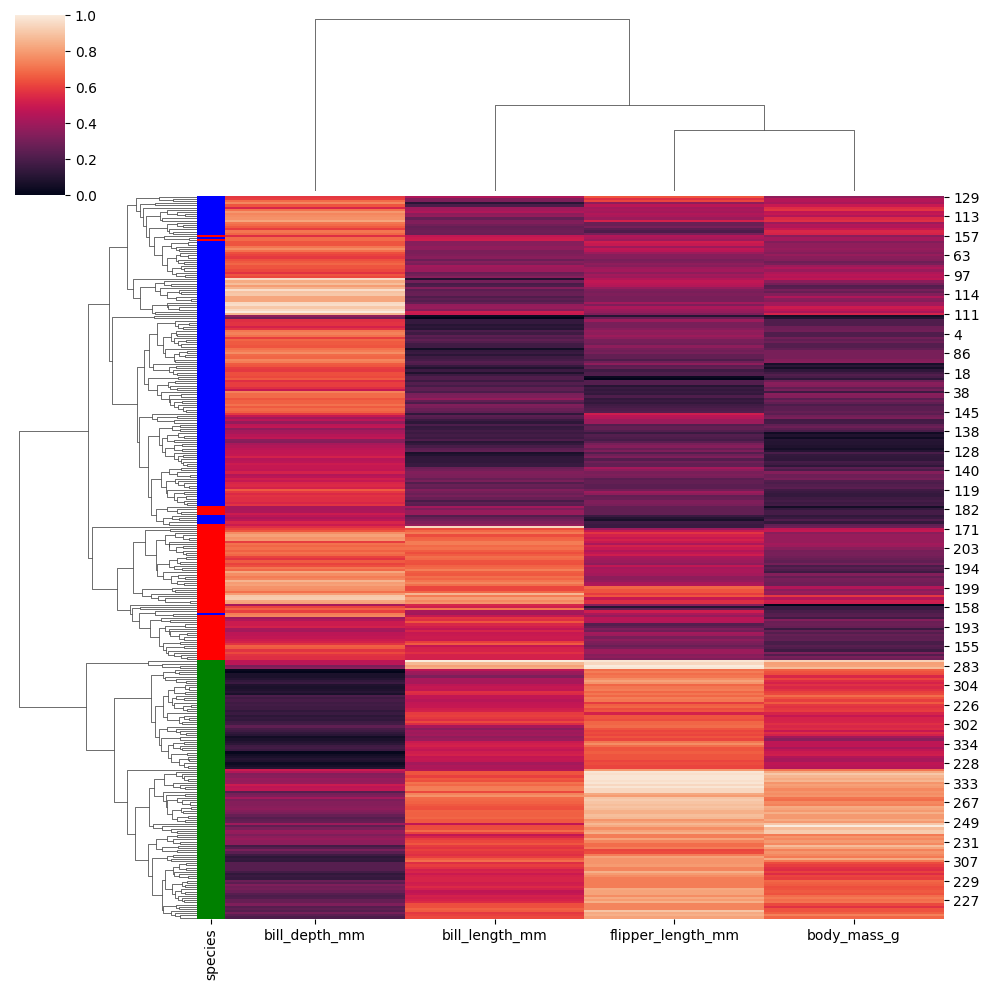

In [17]:
sns.clustermap(penguins[numerical_cols], standard_scale=1, row_colors=species_colors)


## BONUS: Styling

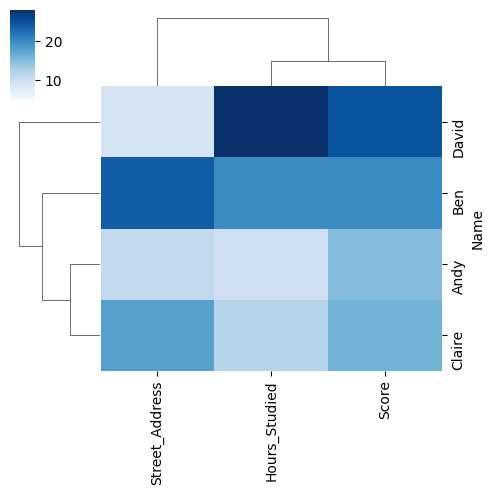

In [18]:
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5)

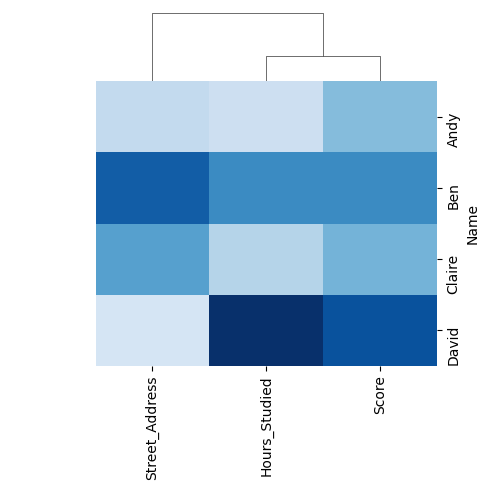

In [19]:
#row_cluster and cbar_pos
sns.clustermap(toy_data, figsize=(5, 5), cmap='Blues', vmin=5,
               row_cluster=False,
               cbar_pos=None #(0,.4,.05,.35)
              )

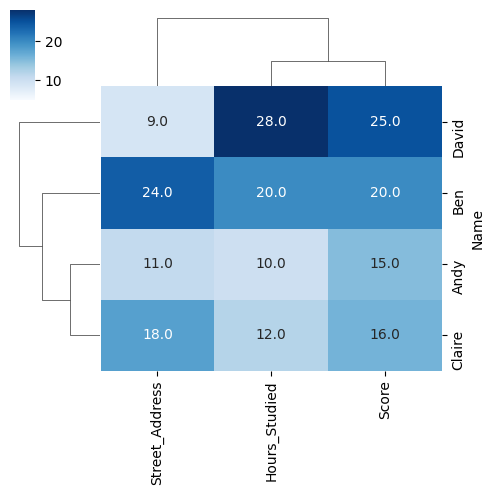

In [20]:
#Annotations with annot and fmt
sns.clustermap(toy_data, figsize=(5, 5), 
               cmap='Blues', 
               vmin=5, 
               annot=True,
                 fmt='.1f')

## Overlays and Thumbnail

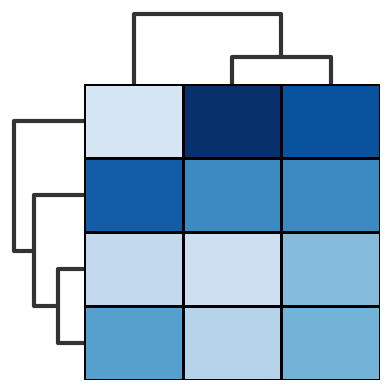

In [21]:

sns.clustermap(toy_data.reset_index().drop('Name', axis=1), 
               figsize=(4, 4), xticklabels=[], 
               yticklabels=[],
               cbar_pos=None,
               cmap='Blues',
               lw=2,
               linecolor='black',
               vmin=5,
               tree_kws={'lw': 3}
              )

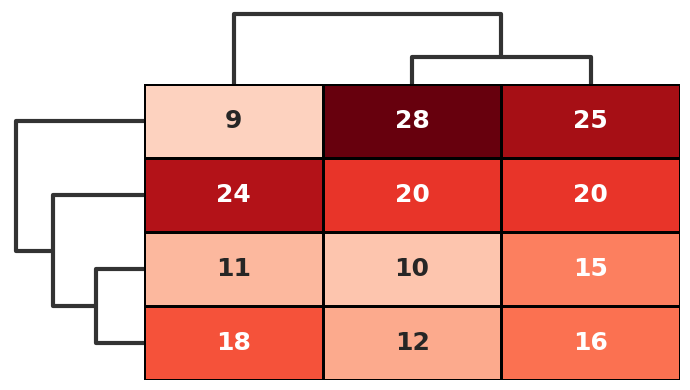

In [22]:
#Thumbnail

sns.clustermap(toy_data.reset_index().drop('Name', axis=1),
               figsize=(7,4), 
               xticklabels=[],
               yticklabels=[],
               cbar_pos=None,
               cmap='Reds',
               vmin=5,
               tree_kws={'lw': 3},
               lw=2,
               linecolor='black',
               annot=True,
               annot_kws={'fontsize': 18, 'fontweight': 'bold'}
              )